# Visualització gràfica d'un dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option("display.max_columns", 30)

# Nivell 1

## Exercici 1

Descarrega el data set [Airlines Delay: Airline on-time statistics and delay causes](https://www.kaggle.com/giovamata/airlinedelaycauses) i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [3]:
df = pd.read_csv('DelayedFlights.csv')

In [4]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Les columnes que conté són:
- **Unnamed**: índex
- **Year**: any del vol
- **Month**: mes del vol
- **DayofMonth**: dia del vol
- **DayOfWeek**: dia de la setmana del vol 
- **DepTime**: hora de sortida del vol real
- **CRSDepTime**: hora de sortida del vol programada
- **ArrTime**: hora d'arribada del vol real
- **CRSArrTime**: hora d'arribada del vol programada
- **UniqueCarrier**: aerolínea
- **FlightNum**: número de vol
- **TailNum**: número de cua de l'avió
- **ActualElapsedTime**: temps de vol real en minuts
- **CRSElapsedTime**: temps de vol programat en minuts
- **AirTime**: temps en l'aire en minuts
- **ArrDelay**: retràs en l'hora d'arribada en minuts
- **DepDelay**: retràs en l'hora de sortida en minuts
- **Origin**: aeroport de sortida
- **Dest**: aeroport de destinació
- **Distance**: distància del vol
- **Taxiln**: temps de taxi de l'arribada en minuts
- **TaxiOut**: temps de taxi de la sortida en minuts
- **Cancelled**: cancel·lació
- **CancellationCode**: codi de cancel·lació
- **Diverted**: desviat
- **CarrierDelay**: retràs atribuït a l'aerolínea en minuts
- **WeatherDelay**: retràs atribuït al clima en minuts
- **NASDelay**: retràs atribuït al sistema d'aviació nacional en minuts
- **SecurityDelay**: retràs atribuït a la seguretat en minuts
- **LateAircraftDelay**: retràs atribuït a l'arribada amb retràs d'un avió en minuts

Per aquest estudi, les columnes de rellevància són: Origin, Dest, Distance, UniqueCarrier, ArrDelay, DepDelay i ActualElapsedTime. Així doncs, simplificarem el dataset:

In [5]:
df = df[['Origin', 'Dest', 'Distance', 'UniqueCarrier', 'ArrDelay', 'DepDelay', 'AirTime', 'ActualElapsedTime']]

## Exercici 2

- Resumeix estadísticament les columnes d’interès

In [6]:
# Resum de les columnes de variables categòriques
for col in ['Origin', 'Dest', 'UniqueCarrier']:
    print(col + ':')
    print('=' * (len(col) + 1))
    print(df[col].value_counts())
    print()

Origin:
ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
        ...  
BLI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: Origin, Length: 303, dtype: int64

Dest:
=====
ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
        ...  
INL         9
PIR         3
CYS         1
OGD         1
TUP         1
Name: Dest, Length: 304, dtype: int64

UniqueCarrier:
WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64



In [7]:
# Resum de les columnes de variables contínues
for col in ['Distance', 'ArrDelay', 'DepDelay', 'AirTime', 'ActualElapsedTime']:
    print(col + ':')
    print('=' * (len(col) + 1))
    print(df[col].describe().to_string())
    print()

Distance:
count    1.936758e+06
mean     7.656862e+02
std      5.744797e+02
min      1.100000e+01
25%      3.380000e+02
50%      6.060000e+02
75%      9.980000e+02
max      4.962000e+03

ArrDelay:
count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03

DepDelay:
count    1.936758e+06
mean     4.318518e+01
std      5.340250e+01
min      6.000000e+00
25%      1.200000e+01
50%      2.400000e+01
75%      5.300000e+01
max      2.467000e+03

AirTime:
count    1.928371e+06
mean     1.082771e+02
std      6.864261e+01
min      0.000000e+00
25%      5.800000e+01
50%      9.000000e+01
75%      1.370000e+02
max      1.091000e+03

ActualElapsedTime:
count    1.928371e+06
mean     1.333059e+02
std      7.206007e+01
min      1.400000e+01
25%      8.000000e+01
50%      1.160000e+02
75%      1.650000e+02
max      1.114000e+03



- Troba quantes dades faltants hi ha per columna

In [8]:
# Número de dades faltants per cada columna
df.isna().sum()

Origin                  0
Dest                    0
Distance                0
UniqueCarrier           0
ArrDelay             8387
DepDelay                0
AirTime              8387
ActualElapsedTime    8387
dtype: int64

- Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [9]:
# Afegim una columna nova amb la velocitat mitjana per vol
df['VelocitatMitjana'] = round(df.Distance / df.ActualElapsedTime, 3)

In [10]:
# Afegim una columna nova amb si el vol arriba tard o no (valor boleà)
df['Retrassat'] = df.apply(lambda row: row.ArrDelay > 0 or row.DepDelay > 0, axis=1)

- Taula de les aerolínies amb més endarreriments acumulats

In [11]:
# Número d'endarriments acumulats per cada aerolínea
df[df.Retrassat][['UniqueCarrier']].value_counts()

UniqueCarrier
WN               377602
AA               191865
MQ               141920
UA               141426
OO               132433
DL               114238
XE               103663
CO               100195
US                98425
EV                81877
NW                79108
FL                71284
YV                67063
B6                55315
OH                52657
9E                51885
AS                39293
F9                28269
HA                 7490
AQ                  750
dtype: int64

- Quins són els vols més llargs? I els més endarrerits?

In [12]:
# Vols més llargs
unique_routes = df[['Origin', 'Dest', 'Distance']].drop_duplicates()
unique_routes[['Origin', 'Dest']] = unique_routes.apply(lambda row: sorted([row.Origin, row.Dest]), axis=1, result_type='expand')
unique_routes.drop_duplicates().sort_values('Distance', ascending=False).head(10)

,Origin,Dest,Distance
173177,EWR,HNL,4962
96292,ATL,HNL,4502
66587,HNL,ORD,4243
66613,KOA,ORD,4213
66624,OGG,ORD,4184
134702,HNL,MSP,3972
172830,HNL,IAH,3904
145183,DFW,HNL,3784
145190,DFW,OGG,3711
808579,ANC,ATL,3417


In [13]:
# Vols més endarrerits
df['TotalDelay'] = df.apply(lambda row: sum([row[delay] for delay in ['ArrDelay', 'DepDelay'] if row[delay] > 0]), axis=1)
df[['TotalDelay']].sort_values('TotalDelay', ascending=False).head(10)

,TotalDelay
686014,4920.0
322516,4918.0
839306,3903.0
1009553,3417.0
1881639,3252.0
1497823,3135.0
685437,3087.0
1214839,3028.0
521096,2980.0
545038,2891.0


## Exercici 3

Exporta el data set net i amb les noves columnes a Excel.

In [14]:
# Exportem el fitxer en csv, un format compatible amb excel que no té limitació en el nombre de files
df.to_csv('AirlinesDelay.csv', index=False)

## Exercici 4

Resumeix gràficament el data set [Airlines Delay](https://www.kaggle.com/giovamata/airlinedelaycauses) i exporta els gràfics com imatges.

Crea almenys una visualització per:
- Una variable categòrica (UniqueCarrier)

In [15]:
vis = pd.DataFrame(df.UniqueCarrier.value_counts()).reset_index()
vis.rename(columns = {'UniqueCarrier':'Count', 'index': 'UniqueCarrier'}, inplace=True)

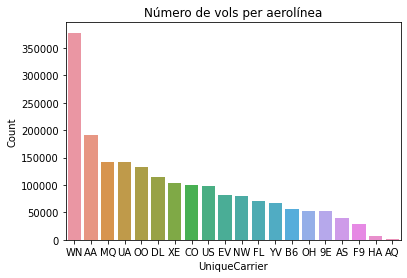

In [16]:
sns.barplot(x='UniqueCarrier', y='Count', data=vis)
plt.title('Número de vols per aerolínea')
plt.savefig('Figure1.png', dpi=300, bbox_inches="tight")

- Una variable numèrica (ArrDelay)

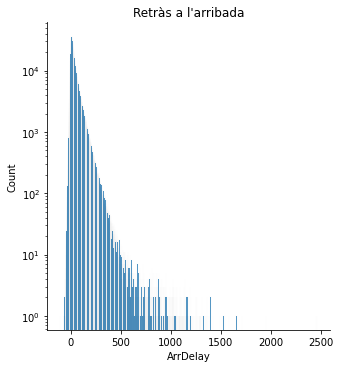

In [17]:
sns.displot(x = 'ArrDelay', data=df, kind='hist')
plt.yscale('log')
plt.title("Retràs a l'arribada")
plt.savefig('Figure2.png', dpi=300, bbox_inches="tight")

- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

In [18]:
# Obtain sorted UniqueCarriers by the ArrDelay's mean
vis = df.groupby('UniqueCarrier').ArrDelay.mean().reset_index()
vis.sort_values('ArrDelay', ascending=False, inplace=True)

# Sort UniqueCarriers of DF
df.UniqueCarrier = df.UniqueCarrier.astype('category')
df.UniqueCarrier.cat.set_categories(vis.UniqueCarrier, inplace=True)

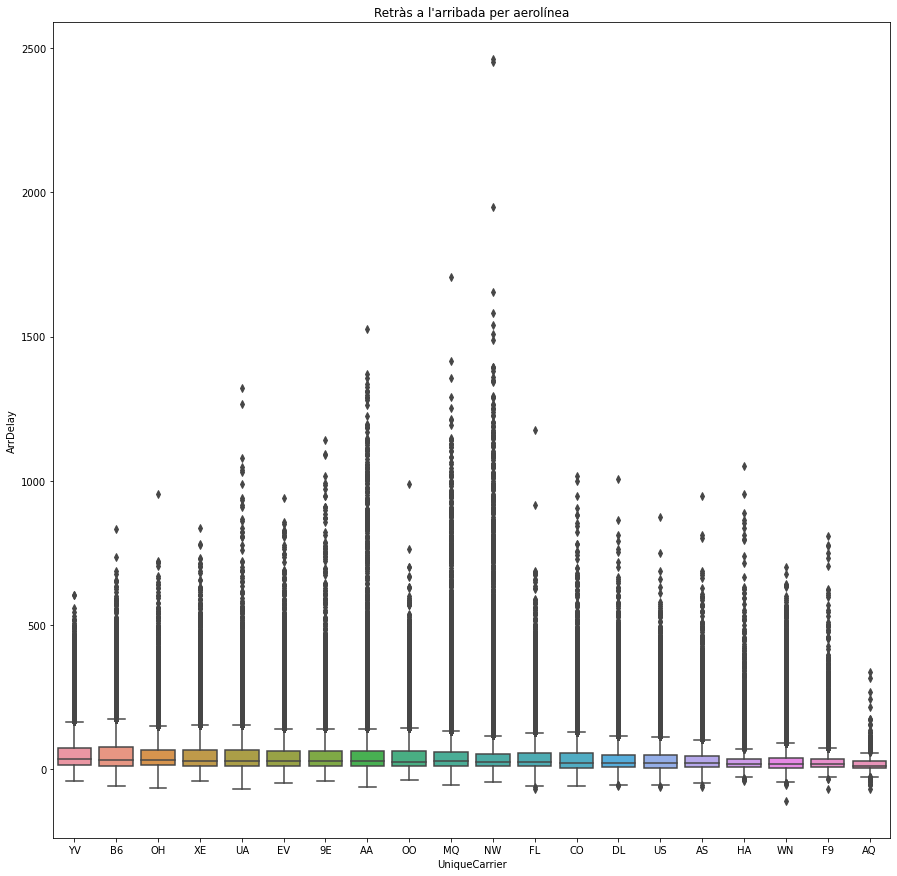

In [19]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=df)
plt.title("Retràs a l'arribada per aerolínea")
plt.savefig('Figure3.png', dpi=300, bbox_inches="tight")

- Dues variables numèriques (ArrDelay i DepDelay)

In [20]:
vis = df[['DepDelay', 'ArrDelay']].dropna(how='any')
res = stats.linregress(x=vis.DepDelay.values, y=vis.ArrDelay.values)

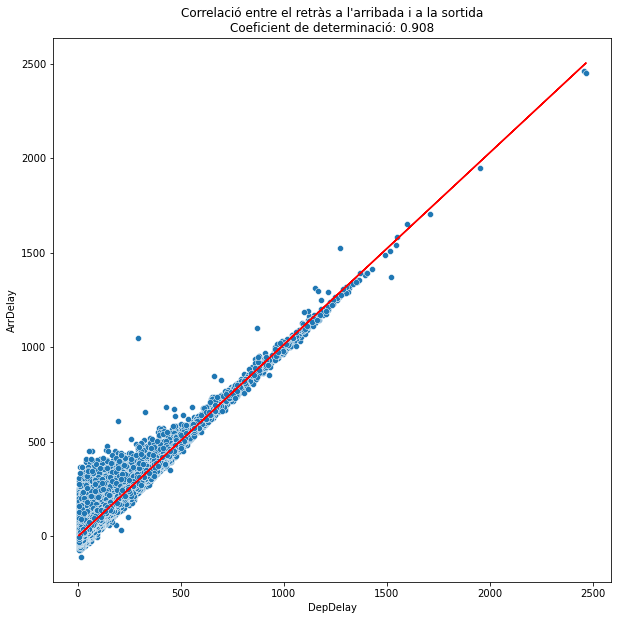

In [21]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=vis)
plt.plot(vis.DepDelay.values, res.intercept + res.slope * vis.DepDelay.values, 'r')
plt.title(f"Correlació entre el retràs a l'arribada i a la sortida\nCoeficient de determinació: {res.rvalue**2:.3f}")
plt.savefig('Figure4.png', dpi=300, bbox_inches="tight")

- Tres variables (ArrDelay, DepDelay i UniqueCarrier)

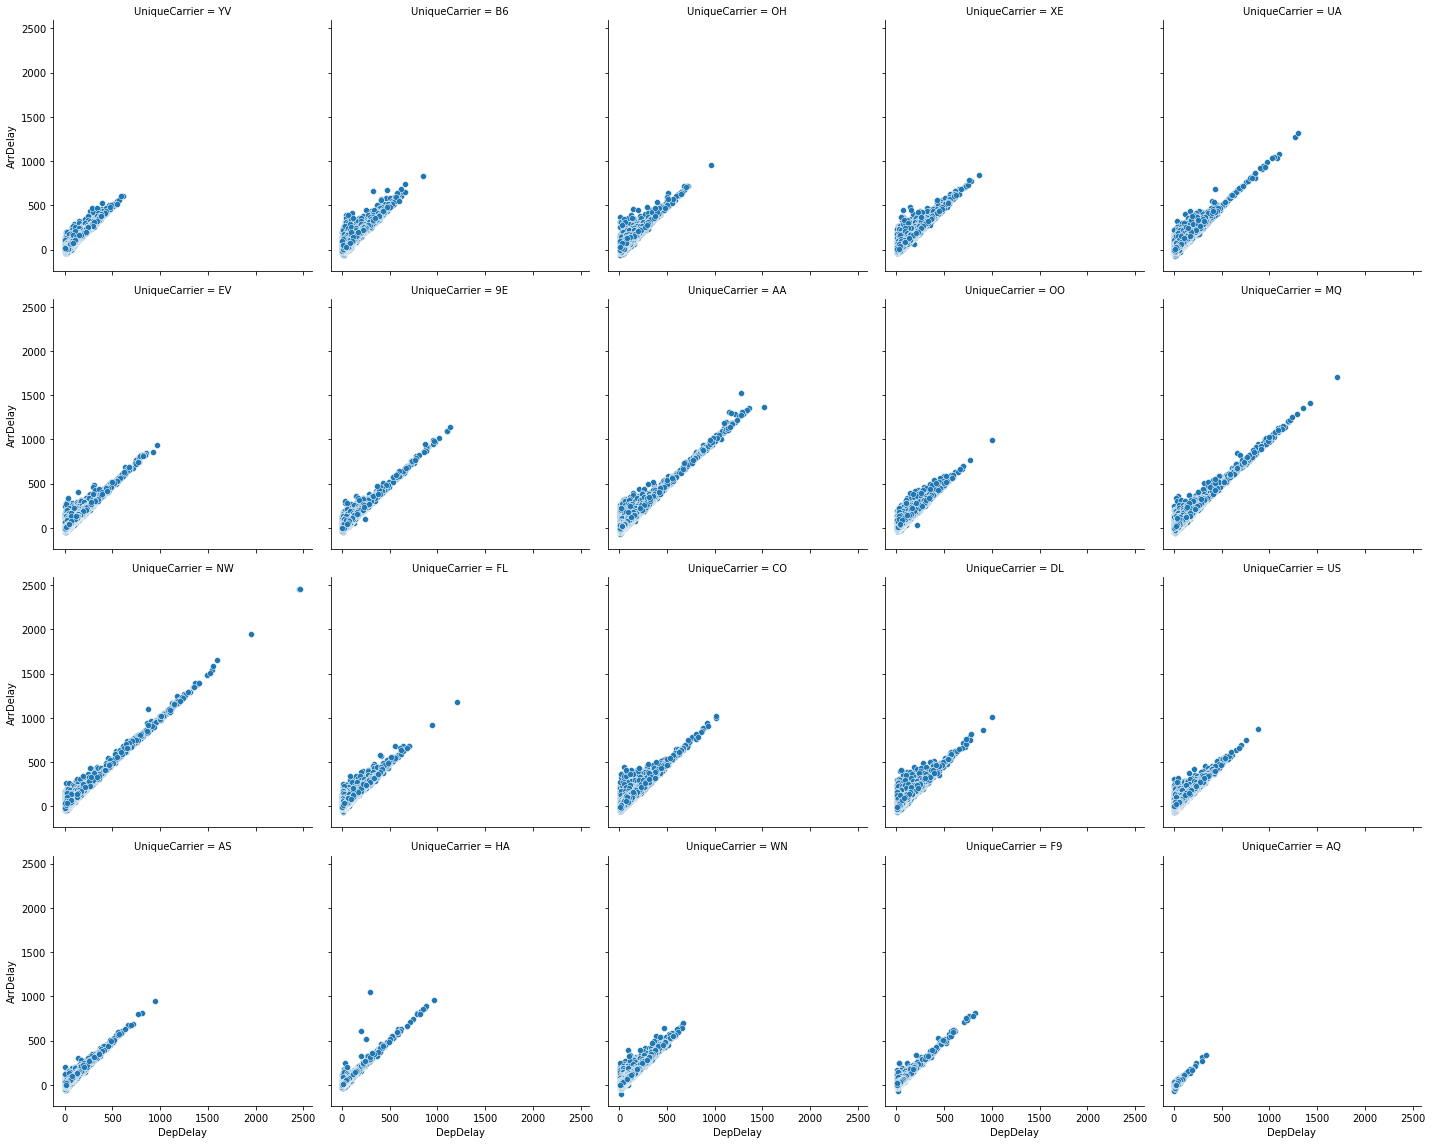

In [22]:
g = sns.FacetGrid(df, col='UniqueCarrier', height=4, col_wrap=5)
g.map_dataframe(sns.scatterplot, 'DepDelay', 'ArrDelay')
plt.savefig('Figure5.png', dpi=300, bbox_inches="tight")

- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

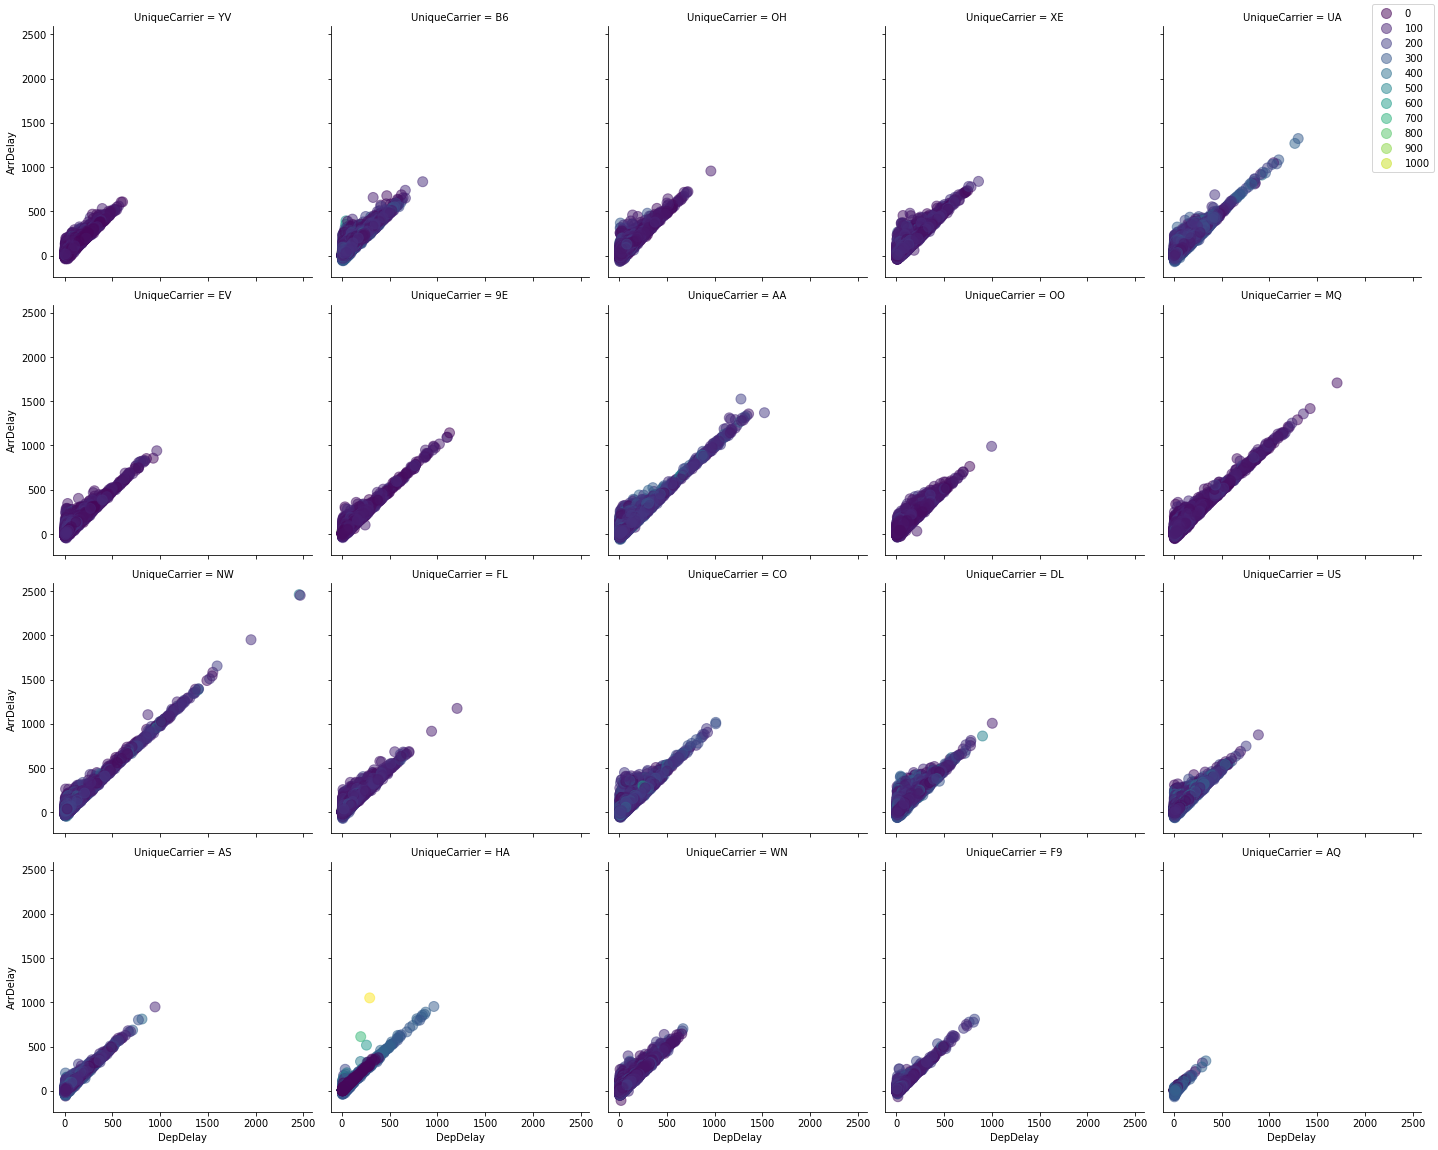

In [23]:
# Global continuous color legend 
# because hue in FacetGrid is only categorical and hue in plots varies
def facet_scatter(x, y, c, **kwargs):
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)
    
vmin, vmax = int(df.AirTime.min()), int(df.AirTime.max())
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=vmin, vmax=vmax)

g = sns.FacetGrid(df, col='UniqueCarrier', height=4, col_wrap=5, palette = 'seismic')
g = g.map(facet_scatter, 'DepDelay', 'ArrDelay', 'AirTime', s=100, alpha=0.5, norm=norm, cmap=cmap)


labels = range(vmin, vmax, 100)
h = [plt.plot([], color=cmap(norm(i)), marker="o", ls="", ms=10, alpha=0.5)[0] for i in labels]
g.fig.legend(handles=h, labels=labels)

plt.savefig('Figure6.png', dpi=300, bbox_inches="tight")